# Part 1 - What is a Neural Network?

Let's pretend that you're hungry, and you're thinking about eating something. In order to decide if you want to eat, you're going to consider several things:

* Is it supper time?
* Is this a special occasion?
* Is this healthy food?

Those seem like simple questions, but maybe one of questions is more important than the other two? Let's say that the most important thing is whether or not the food is healthy: if it's junk food, you'll pass. The second most important thing is whether today is a holiday: you might consider eating junk food if it's Thanksgiving or Easter, but if it's another Monday, well, you've got the weekend to work off. Finally, you know you'll never eat junk for breakfast, but if it's supper,then maybe you'll just let it slide.

Now suppose you're a certain type of nerd who likes to formulate all of these considerations into a equation that you can use to help you decide your meal choices in the future. If you are, you might come up with something like this:

![Single Node Perceptron](http://neuralnetworksanddeeplearning.com/images/tikz0.png)

That may seem like a weird way to write it out, but what you're looking at there is a neural network with a single node. You'll notice that you have three X's, and each of those corresponds to our three considerations on whether to not eat food. Each of these considerations come together in the circle - that's called a node. The node represents you trying to make up your minds about what to eat. Finally, you have an output, which will be your decision about whether or not to eat something! That doesn't seem too crazy.

Being the smart nerd you are, you now have a way to model your decision, but you have to determine how you're going to represent your inputs and outputs. Well, being a nerd, you're probably familiar with computers, so you'll know a easy way to represent whether or not something is true is to use a Boolean value. A Boolean has two possible values: 1 for true, and 0 for false. So for your three input values, you can pass in a 1 if any of our three questions are true; otherwise, you'll pass in a 0 if they're false. Since this is all pretty simple, you can also use a Boolean for the output! If you get a 1, then yes, it's time to chow! If it's a 0, you know that no thanks bro, you'll eat later.

Okay, everything is in place. Now let's say that today is a holiday, and you're considering eating ice cream for lunch. Each one of your questions would break down like this:

* Are you eating supper? No, it's lunch - so pass in 0 for x1
* Is this a special occasion? Yes, it's a holiday - so pass in a 1 for x2
* Is this healthy food? No, it's ice cream - so pass in a 0 for x3

Cool! You now have all your inputs, but hmm...how are you going to make up your mind? How about you keep this simple: let's say if two of those questions are true, then yes, you want to eat the food! That sounds easy enough to write some code for:

In [21]:
def node(x1, x2, x3):
    total = x1 + x2 + x3
    threshold = 2
    
    if total >= threshold:
        return 1
    else:
        return 0
    
node(0, 1, 0)

0

Woohoo! That was simple. You'll notice that the code sums up all the inputs, then checks to see if the total is greater than or equal to threshold. The threshold is very important, because it tells the node whether or not it can activate and fire off a value by returning 1, otherwise the node will do nothing and return a 0. Pretty cool huh?

But hold up! Aren't you forgetting something? If you remember, you want to weigh your decisions and give greater weight to the fact of whether or not today is a special occasion. That may seem tricky, but you can model that by multiplying each of the inputs by a unique weight. Let's break it down like this:

* Are you eating supper? Least Important - Weight of 1
* Is this a special occasion? - Most Important - Weight of 3
* Is this healthy food? Somewhat Important - Weight of 2

As you can see, today being a special occasion is our most important consideration, so we give it the greatest weight. So let's modify our original code to multiply the weights.

In [20]:
def node(x1, w1, x2, w2, x3, w3):
    total = x1 * w1 + x2 * w2 + x3 * w3
    threshold = (w1 + w2 + w3) / 2
    
    if total >= threshold:
        return 1
    else:
        return 0
    
node(0, 1, 1, 3, 0, 2)

1

Now that you've given greater weight to today being a holiday, you'll now notice that you should eat ice cream - this is sounding better and better! If you look over the logic, you'll notice a pattern emerges: the output of a node is equal to the sum of all the node's inputs multiplied by the respective weight and compared to a threshold. You can write that more succinctly like this:

```
output = sum(all inputs * all weights) > threshold
```

Neat! Let's modify that slightly:

```
output = sum(all inputs * all weights) - threshold > 0
```

Cool. Now typically in neural networks, most data scientists refer to subtracting the threshold as the node's bias. Let's change that to use bias instead of threshold, x instead of inputs, and w instead of weights:

```
output = sum(all x's * all w's) + bias > 0
```

Okay, not too bad. Now let's make one more change that treats all the x's and w's as lists, because in Python we can easily multiply lists of numbers together:

```
output = sum(x * w) + bias > 0
```

Now that's a clean way to write that! When you place all your inputs and weights in a list, that is called a vector. In the case of whether or not you should eat food, you have a vector with a length of 3, because you have 3 inputs for your 3 questions! You can also refer to this as a 3-dimensional vector. So let's take our simplified equation and rewrite the node function:

In [19]:
import numpy as np

def node(x, w, b):
    activations = np.multiply(x, w)
    total = np.sum(activations)
    
    if total + b > 0:
        return 1
    else:
        return 0
    
node([0, 1, 0], [1, 3, 2], -2)

1

Not bad. Seems a bit complex, but let's take this code apart. First, you'll notice that numpy gets imported. Numpy is a math library for Python that does really handy things, like multiply our two vectors together into a new vector called activations. Activations are the input values of our node. Once numpy multiples the input and weight vectors together, it then sums the activations into a total. Third, you'll see that the bias gets added to the summed total, just like our equation above, and then the sum gets compared to 0: if it's greater than 0, the node activates, otherwise, nothing happens.

At this point, you can stop and pat yourself on the back, because you have just created your very first Perceptron, which is a kind of neural network created in the 1950s and 1960s by Frank Rosenblatt! A Perceptron is a neural network built from nodes that output 0 or 1. You can use Perceptrons to model things like logic gates. But things have come a long way since the Perceptron, and it's far more useful to have a neural network in which the nodes output something other than 0 or 1. So let's go back to the drawing board and see if you can 

For reference, here's the equation from above:

```
output = sum(x * w) + bias > 0
```

Now let's treat this as something as other than a Perceptron:

```
output = sum(x * w) + b
```

That's it: bye-bye zero comparison! The output is now the sum the inputs multipled by the weights and added to the bias. Let's simplify one step further by using something called the dot product, which is by definition the sum of two multiplied vectors. In this case, this would be the sum of the inputs times the weights:

```
output = x · w + b
```

Concise! Let's update the code:

In [2]:
import numpy as np

def node(x, w, b):
    activations = np.multiply(x, w)
    total = np.sum(activations)
    output = total + b
    
    return output
    
node([0, 1, 1], [1, 3, 2], -2)

3

Whew! Now before you go any further, let's take a step back and talk further about what is a neural network. Well, as you saw in the picture at the top of this notebook, a neural network is a collection of inputs that go into a node, which spits out an output. It's based on the idea of neurons, which you have in abundance in your brain. In your brain, neural signals (inputs) are transmitted into a neural cell (node). When the cell hits a certain threshold (bias), it fires a new signal (output). Sound familiar? And just like your brain, most neural networks are made up of many different nodes that are all interconnected together and look something like this:

![Neural Network](http://neuralnetworksanddeeplearning.com/images/tikz11.png)

Notice that the neural network has many different inputs that feed into a bunch of nodes called the hidden layers, which then spit out an output layer. A layer is just all of the nodes in a column within the neural network.You'll also notice that this neural network many different outputs. It's possible to have many different outputs in the neural network vs. just one. Neural networks are used for all sorts of things, including such mundane tasks as recognizing your face on Facebook when you snap a selfie, predicting tomorrow night's football scores, or helping a doctor identify a patient's disease.

Wait a sec, did that just say help a doctor identify a patient's disease???? Yep! How can it do that? Can it let me win tomorrow night's game in Fantasy Football? And what are hidden layers? Well, the hidden layers are the part of the neural network where all the magic happens. A neural network learns by using something called the Stochastic Gradient Descent algorithm, or SGD for short. When the input comes into the neural network it goes through the hidden layers and gets transformed into the output using SGD.

## Stochastic Gradient Descent

![Stochastic Gradient Descent](https://upload.wikimedia.org/wikipedia/commons/f/f3/Stogra.png)

What is Stochastic Gradient Descent (SGD) you ask? Quite simply, SGD is a way to converge on a value. It starts with an input value, and then it converges on an output value over time. How does it do this, and what's with the big fancy name? Well, let's unpacked each of the words in SGD.

Stochastic basically means "random fluctuations." Looking at the graph above, you'll notice that the line fluctuates over time on its journey to the output value; but despite these fluctuations, the graph still discernably converges downward to a value. That's where the second term comes in: Gradient. A gradient is a gradual change from one value to another value. Looking at the graph, you can see that the value gradually changes from -4 to -9. Finally, Descent means that the input value converges downward towards the target output value over time.

If you're paying attention, you'll notice that the phrase "over time" was mentioned several times. That's because a neural networks learns by changing the weights and biases of each of its nodes so that the input will transform into the output on its way through each of the nodes. The neural network figures out its weights and biases through training, which is another way of saying, let's feed a bunch of inputs into the neural network and have each input generate an output using the weights and biases a neural network currently has. Once the neural network generates the outputs, you can compare them to the expected outputs for each of the inputs. If the generated outputs don't match the expected outputs, then something must be off! If something is off, then the neural networks needs to change its weights and biases and run through all of the inputs again!

That sounds like a lot of work, and it is! But for a computer these days, it's not too bad. As the neural network continues to train, over time the weights and biases will continue to be tweaked until eventually the generated output values converge on the expected outputs. Looking at the graph above, you'll notice that the neural network started by generating outputs of -4, but over time, it learned, and finally, it converged on -9, which is either the expected value or very close to it. By now, you're probably asking yourself, how does SGD know how to much to change the weights and biases? Well, let's dive in and found out!

## Loss Function

First, you need to define something called a loss function. The loss function is what determines how different the generated output is from the expected output. A very simple loss function would look like this:

In [25]:
def loss(expected, predicted):
    return expected - predicted

loss(0, 1)

-1

Now this would work in theory, but in practice, it doesn't work as expected. If you take a look at the image above, you'll notice that the graph slows down at the very end as it gets close to the expected output. You can fix this by pulling a calculus trick and integrating the loss function. Yes, you can fix this by integrating the loss function. Don't freak out! It's not as complex as it might sound. Here's what it looks like:

In [30]:
def loss(expected, predicted):
    return (expected - predicted)**2 / 2.0

loss(0, 1)

0.5

You can intuitively think of integrating the loss function as accentuating the difference between the expected output and the generated output. Let's re-run the loss function with a very small difference and a very large difference.

In [31]:
# difference is 0.1
loss(0, 0.1)

0.005000000000000001

In [32]:
# difference is 0.9
loss(0, 0.9)

0.405

As you can see a small difference is made even smaller by the integrated loss function, and a large difference still remains large. That's exactly the behavior you want! You want to make small changes when your generated output is close to the expected output, and you want to make large changes when your generated output is far from the expected output.

Another reason why you want to integrate the loss function is because you want to be able to tell how fast the difference between the expected and predicted value is changing. You can only do that if your loss function is integated. Otherwise, the math does NOT check out!

One other thing worth noting is that the loss function is calling the generated output the `predicted` output, which means that the generated output is a prediction generated by the neural network about what it thinks the output should be for the given input.

Whew! Feel free to re-read this section if you find it confusing.

## Weights and Biases

Now that you have your loss function, you're going to want to take the value generated by the loss function and apply it back to your weights and biases to generate new weights and biases. But before you do that, let's hold up a sec, and talk about nodes again. If you remember from the first section in this notebook, a node was defined like this:

```
output = x · w + b
```

Where the output is equal to the sum of all the inputs multiplied by all the weights for each of those inputs and then added to the bias. In an effort to keep this simple, let's consider a single node with a single input to a single output:

![Simple Node](single_node.png)

Okay, super simple! Let's rewrite the node equation so that it only deals with a single input and a single weight:

```
output = wx + b
```

Hmm...that looks very familiar doesn't it. Let's change a couple of things:

```
y = mx + b
```

Whoa! Remember Algebra? That's the slope-intercept formula for a line! All that changed between the node equation and the slope-intercept equation is that `output` was renamed to `y`, and `w` to `m`. But by writing it this way, it means you can graph the input and output of your neural network! Let's do it!

In [4]:
%matplotlib inline
from numpy import random
from matplotlib import pyplot as plt

def node(w, x, b):
    return w * x + b

n = 30                       # number of inputs
w = random.random() * 10     # random weight between 0 - 10
b = random.random() * 10     # random bias between 0 - 10
x = random.random(n)         # generate n number of random inputs between 0 - 1
y = node(w, x, b)            # generate the outputs using the node function!

In [42]:
x

array([ 0.41068666,  0.92733854,  0.14943682,  0.58758323,  0.32940179,
        0.53166024,  0.23197056,  0.34138973,  0.30539597,  0.79374219,
        0.25507106,  0.81419944,  0.79948635,  0.38300071,  0.1735733 ,
        0.47150286,  0.90770042,  0.0952911 ,  0.42825036,  0.14352153,
        0.31405727,  0.69182918,  0.15857629,  0.66940989,  0.48948615,
        0.21350026,  0.97721886,  0.72155161,  0.78947523,  0.78024372])

In [43]:
y

array([ 7.37959544,  9.22273658,  6.44759393,  8.01066899,  7.08961392,
        7.8111653 ,  6.74203076,  7.13238058,  7.00397383,  8.74613535,
        6.82444113,  8.81911598,  8.76662746,  7.2808266 ,  6.53370017,
        7.59655554,  9.15267812,  6.25443058,  7.44225344,  6.4264913 ,
        7.03487279,  8.38256352,  6.48019875,  8.30258335,  7.6607104 ,
        6.67613846,  9.40068322,  8.48859746,  8.73091307,  8.69797993])

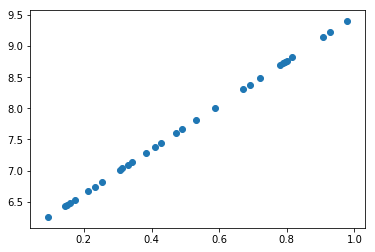

In [44]:
# draw a scatter plot with the random inputs and generated outputs
plt.scatter(x,y)

Neat! You'll notice that matplotlib is imported. matplotlib is a handy Python library for creating graphs. Now that you have a bunch of inputs and outputs, let's figure out how to modify the weights and biases. First, let's create new weights and biases that are different than the one's above which were used to generated the output.

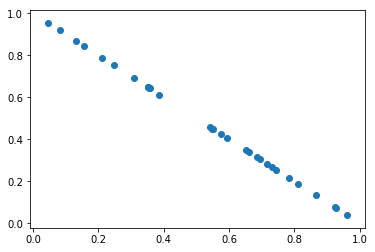

In [10]:
w_guess = -1.0
b_guess = 1.0

y_predictions = node(w_guess, x, b_guess)

plt.scatter(x, y_predictions)

As you can see, the graph is now listing very different output values. These new values can be fed into the loss function, and be used to modify the `w_guess` and `b_guess`. You can do this by using another calculus trick: taking the derivative of the node function with respect to the weight for the `w_guess`, and the derivative of the node function respect to the bias for the `b_guess`. Oops, that sounds like a like of scary math. But don't freak out! Let's talk at a high level about what's being done before getting into things.

What is a derivative? A derivative of a function can be thought of as the rate of change of that function. Another way to put it is this: when you feed any input into a function, how much is that input changing by when it becomes the output? Suppose you had an x value of 2, with a weight of 2 and a bias of 1. That would give you a 5 as the output. Now let's say you add 1 to the x value, so now you have 3. You put that through the node function, and you now get 7 as the output. That means that between 2 to 3, the node function is changing by 2. So if you took the derivative of the node function at 3, you would get a 2.

Whew! That sounds more complicated then it really is, so let's go back to the graphs you have above. You know that the predicted output in the second graph doesn't match the expected output from the first graph. That's a problem. What you want to know is how much the weights and biases are causing the input to change into the output! If you know that, then you know how much you want to change your weights and biases by so that you can change the predicted output, and get it to be closer to the expected output.

So let's take a stab at the math. Remember that your loss function looks like this:

In [49]:
def loss(expected, predicted):
    return (expected - predicted)**2 / 2.0

But what is the predicted value, really? Well, it's the node function, which you know is this:

In [50]:
def node(w, x, b):
    return w * x + b

So let's put those two functions together!

In [51]:
def loss(y, w, x, b):
    return (y - (w * x + b))**2 / 2.0

Cool! Notice that for simplicity, `expected` is changed to`y`. Now that you have a complete equation, let's take the partial derivative of the loss function using the chain rule to solve it. Why the partial derivative and not the full derivative? Well, because the loss function above has four different variables. If you wanted to know the full derivative, you would derive the function for each one of the variables. But what you want to know is how much the loss function changes when the weights changes. You don't care about the other variables. The same goes for the bias. Let's break it down:


```
z = (y - (w * x + b))
loss = z**2 / 2.0

dz/dw = -x
dz/db = -1

dloss/dz = z

dloss/dw = dloss/dz * dz/dw = z * -x = (y - (w * x + b)) * -x = x * ((w * x + b) - y)
dloss/db = dloss/dz * dz/db = z * -1 = (y - (w * x + b)) * -1 = (w * x + b) - y
```

Khan Academy is a good place to brush up on your [partial derivatives](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivatives/v/partial-derivatives-introduction) and the [chain rule](https://www.khanacademy.org/math/ap-calculus-ab/product-quotient-chain-rules-ab/chain-rule-ab/v/chain-rule-introduction). It looks much scarier than it is. Again, all partial derivatives mean is that you want to how the equation changes when one of the terms changes. In this case, the term is either the weight or the bias. The chain rule is a way to derive an equation when you have an outer function (the square function in this case), and an inner function (the difference between the output and the node function).

Now that you know how much the loss function is being changed by the weight and the bias, let's write some code that will change the weights and biases!

## Teaching a Neural Network to Learn!

In [6]:
def dloss_dweight(y, w, x, b):
    '''
    Calculate the change in weight
    '''
    dldw = x * ((w * x + b) - y)
    
    return dldw.mean()

def dloss_dbias(y, w, x, b):
    '''
    Calculate the change in bias
    '''
    dldb = (w * x + b) - y
    
    return dldb.mean()

def learn(learning_rate, y, w_guess, x, b_guess):
    '''
    Train a Neural Network
    '''
    dldw = dloss_dweight(y, w_guess, x, b_guess)
    dldb = dloss_dbias(y, w_guess, x, b_guess)
    
    w_guess -= learning_rate * dldw
    b_guess -= learning_rate * dldb
    
    return w_guess, b_guess

Whoa! There's a lot going on there, so let's talk about each part. First up are the derived functions, which are the same equations that you derived above! The only difference is now you're getting the `mean()` or average of all the values, since you're passing in a list of inputs and generating a list of outputs. Finally, you have a `learn` function, which teaches the neural network how to change the weight and bias. Most of this is just glue for calling the other functions, but you'll notice another parameter is being passed in: learning rate.

The learning rate is the last piece of the puzzle to get the neural network to do something. The learning rate acts as a throttle to force the neural network to learn slowly. Slower learning means more accurate results. Typically `learning_rate <= 0.1`.

So let's define a learning rate and run the neural network!

In [11]:
learning_rate = 0.1

print "Starting Weight Guess: {}".format(w_guess)
print "Starting Bias Guess: {}".format(b_guess)

w_guess, b_guess = learn(learning_rate, y, w_guess, x, b_guess)

w_guess, b_guess

Starting Weight Guess: -1.0
Starting Bias Guess: 1.0


(-0.51570984357833272, 1.8105980831060076)

Did you see that! Our w_guess an b_guess values changed. If you compare them to w and b, you'll see that the guess values are growing closer to the original values. That's good! Why don't you run the learning algorithm several more times and see what happens:

In [12]:
epochs = 10            # number of times you want to train your network
learning_rate = 0.1    # how fast the network should learn
w_guess = -1.0
b_guess = 1.0

print "Starting Weight: {}".format(w)
print "Starting Bias: {}".format(b)

def trainer(epochs, x, y, w_guess, b_guess, learning_rate):
    for e in range(epochs):
        print "\n~~~~ Training Epoch {} ~~~~".format(e)
        w_guess, b_guess = learn(learning_rate, y, w_guess, x, b_guess)
        print "New Weight: {}".format(w_guess)
        print "New Bias: {}".format(b_guess)
        
trainer(epochs, x, y, w_guess, b_guess, learning_rate)

Starting Weight: 6.68386435645
Starting Bias: 5.01897974025

~~~~ Training Epoch 0 ~~~~
New Weight: -0.515709843578
New Bias: 1.81059808311

~~~~ Training Epoch 1 ~~~~
New Weight: -0.0915851394861
New Bias: 2.51437725668

~~~~ Training Epoch 2 ~~~~
New Weight: 0.280173969068
New Bias: 3.12521957577

~~~~ Training Epoch 3 ~~~~
New Weight: 0.606354353988
New Bias: 3.65520402028

~~~~ Training Epoch 4 ~~~~
New Weight: 0.892861470569
New Bias: 4.11484068246

~~~~ Training Epoch 5 ~~~~
New Weight: 1.1448338374
New Bias: 4.51327453775

~~~~ Training Epoch 6 ~~~~
New Weight: 1.36674264736
New Bias: 4.85846274935

~~~~ Training Epoch 7 ~~~~
New Weight: 1.56247844096
New Bias: 5.15732894407

~~~~ Training Epoch 8 ~~~~
New Weight: 1.73542652229
New Bias: 5.41589745056

~~~~ Training Epoch 9 ~~~~
New Weight: 1.88853257987
New Bias: 5.6394101023


As you can see, over time the new weight and bias slowly approach the old weight and bias. You'll notice that the code calls each iteration of training an epoch: this is the standard terminology in machine learning. Be aware that the neural network may not train those values to be identical to the original values. Try training the neural network for a 100 or 1000 epochs and see what happens!

But you know what? Since you imported matplotlib, why not graph the outputs after each output? That way you can see what's happening!

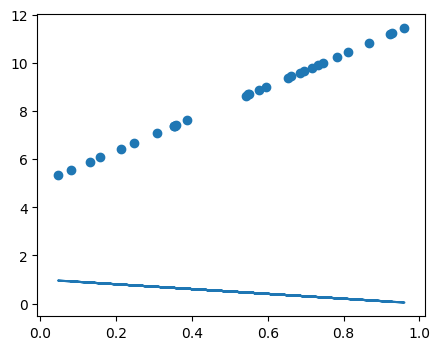

In [13]:
w_guess = -1.0
b_guess = 1.0

# create graph
fig = plt.figure(dpi=100, figsize=(5, 4))

# draw a scatter plot of the target values
plt.scatter(x, y)

# draw the initial guess as a line
line, = plt.plot(x, node(w_guess, x, b_guess))

# finish graph so that nothing can be added
plt.close()

# initial graph
fig

This is the starting graph. Now let's update it after each epoch and see what happens!

In [137]:
from matplotlib import animation, rc

# configure matplotlib to display the animation inline
rc('animation', html='html5')

def animator(i):
    global x
    global y
    global w_guess
    global b_guess
    global learning_rate
    
    # for each frame of animation train the neural network
    w_guess, b_guess = learn(learning_rate, y, w_guess, x, b_guess)
    
    # update the predicted y values with the new set
    # of y values based on the new w_guess and b_guess values
    line.set_ydata(node(w_guess, x, b_guess))
    
    return line,

animation.FuncAnimation(fig, animator, interval=100)

Putting it all together, the code looks like this:

In [141]:
%matplotlib inline
from numpy import random
from matplotlib import pyplot as plt, animation, rc

# configure matplotlib animations
rc('animation', html='html5')

def node(w, x, b):
    '''
    Neural network node: output = weights * inputs + bias
    '''
    return w * x + b

def loss(y, w, x, b):
    '''
    Mean squared error loss function
    '''
    return (y - (w * x + b))**2 / 2.0

def dloss_dweight(y, w, x, b):
    '''
    Calculate the change in weight
    '''
    dldw = x * ((w * x + b) - y)
    
    return dldw.mean()

def dloss_dbias(y, w, x, b):
    '''
    Calculate the change in bias
    '''
    dldb = (w * x + b) - y
    
    return dldb.mean()

def learn(learning_rate, y, w_guess, x, b_guess):
    '''
    Train a Neural Network
    '''
    dldw = dloss_dweight(y, w_guess, x, b_guess)
    dldb = dloss_dbias(y, w_guess, x, b_guess)
    
    w_guess -= learning_rate * dldw
    b_guess -= learning_rate * dldb
    
    return w_guess, b_guess

def animator(i):
    '''
    Animation function for displaying neural network
    y predictions as a line on a graph
    '''
    global x
    global y
    global w_guess
    global b_guess
    global learning_rate
    
    # for each frame of animation train the neural network
    w_guess, b_guess = learn(learning_rate, y, w_guess, x, b_guess)
    
    # update the predicted y values with the new set
    # of y values based on the new w_guess and b_guess values
    line.set_ydata(node(w_guess, x, b_guess))
    
    return line

# config!
n = 30                              # number of inputs
w = random.random() * 10            # random weight between 0 - 10
b = random.random() * 10            # random bias between 0 - 10
x = random.random(n)                # generate random inputs between 0 - 1
y = node(w, x, b)                   # generate outputs using the node function!
w_guess = random.random() * 2 - 1   # generate random weight between -1 - 1
b_guess = random.random() * 2 - 1   # generate random bias between -1 - 1
epochs = 10                         # number of iterations to train for
learning_rate = 0.1                 # how fast to train the network (as a percentage)

# create graph
fig = plt.figure(dpi=100, figsize=(5, 4))

# draw a scatter plot of the target values
plt.scatter(x, y)

# draw the initial guess as a line
# plt.plot can draw two lines and returns those two lines
# but only the first line matters for this example
line, = plt.plot(x, node(w_guess, x, b_guess))

# finish graph so that nothing can be added
plt.close()

# create animation!
animation.FuncAnimation(fig, animator, interval=100)

# Part 2 - Building a Working Neural Network

## Credits

Thanks to the [fast.ai](http://course.fast.ai/) MOOC for helping me grok all of this. The visualizations were for this document were taken directly from [this fast.ai notebook](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/sgd-intro.ipynb) on SGD. Additional ideas were taken from the [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html) book by Michael Nielsen. While I did not want to gloss over the math in this notebook, I did attempt to simplify it.  Another great breakdown of the math can be found in [this blog post](http://blog.demofox.org/2017/03/09/how-to-train-neural-networks-with-backpropagation/).

Please leave me feedback if you found something unclear, and thanks for reading!